# How to Use Camera3D

This is a simple demonstration of how you can use py5 with the Processing library Camera3D.

## Import Jars

Camera3D is a Processing library, and therefore the library itself is written in Java. The library is stored in a Jar file that must be added to the Java classpath. The simplest way to do this is to use py5's
built in support for downloading Processing libraries and adding them to the classpath.

Use the [](/reference/py5tools_processing_download_library) function to download and install Camera3D to the [Processing library install directory](py5tools_processing_library_storage_dir). This only needs to be done once for each computer.

In [1]:
import time

import py5_tools

py5_tools.processing.download_library('Camera 3D')

{'name': 'Camera 3D',
 'version': '7',
 'prettyVersion': '1.2.4',
 'downloadDate': datetime.datetime(2025, 5, 10, 22, 20, 48),
 'dir': 'Camera3D'}

## Import py5

Import the py5 library. When the library is imported the Java Virtual Machine (JVM) is started. Any additions or changes to the Java classpath must be done before importing py5.

In [2]:
import py5

Importing py5 on macOS but the necessary Jupyter macOS event loop has not been activated. I'll activate it for you, but next time, execute `%gui osx` before importing this library.


## Import Camera3D

The following line of code will allow us to create an instance of the Camera3D class in the `setup()` method.

In [3]:
from camera3D import Camera3D

There is no actual Python package called camera3D that `from camera3D import Camera3D` is importing from. The reason why the previous cell works is because of some jpype import magic activated with `import jpype.imports` in the first cell. After the next py5 release this will be activated for you, so there will no longer be a need to import `jpype.imports` explicitly.

## Define Global Variables

Define some global variables that will be used by the Sketch.

In [4]:
rot_x = 0
rot_y = 0
rot_z = 0

## Define `setup` Method

The setup method will set the frame rate and other basic setup stuff. It will also create an instance of Camera3D and set some Camera3D options.

In [5]:
def setup():
    py5.size(400, 400, py5.P3D)
    py5.frame_rate(30)
    py5.stroke_weight(8)
    py5.stroke(0)
    py5.no_fill()

    camera3D = Camera3D(py5.get_current_sketch())
    camera3D.setBackgroundColor(py5.color(192))
    camera3D.renderDefaultAnaglyph().setDivergence(1)

## Define `pre_draw` Method

The `pre_draw` method is a Camera3D addition that runs once before any calls to the `draw` method. Camera3D will call the `draw` method multiple times per frame. It is helpful to have the ability to have some code run only once per frame instead of multiple times. In this case, we are adjusting the rotation variables.

In [6]:
def pre_draw():
    global rot_x, rot_y, rot_z
    rot_x += 0.8
    rot_y += 0.3
    rot_z += 0.5

## Define `draw` Method

The draw method will do some transformations and draw a box.

In [7]:
def draw():
    py5.translate(py5.width / 2, py5.height / 2, -200)
    py5.rotate_x(py5.radians(rot_x))
    py5.rotate_y(py5.radians(rot_y))
    py5.rotate_z(py5.radians(rot_z))

    py5.box(250)

## Define `post_draw` Method

Similar to `pre_draw`, the `post_draw` method is run after all calls to the `draw` method. This `post_draw` method doesn't do anything, but we will need it for reasons that will be clear later.

In [8]:
def post_draw():
    pass

## Run the Sketch

Run the sketch, opening a window on the display. If you are runnning this notebook locally, you will see a new window open for the running Sketch.

In [9]:
py5.run_sketch()

Camera 3D 1.2.4 by Jim Schmitz https://ixora.io


Here's a screenshot, so readers of the static documentation website can understand what is happening:

Output(layout=Layout(max_height='200px', overflow='auto'))

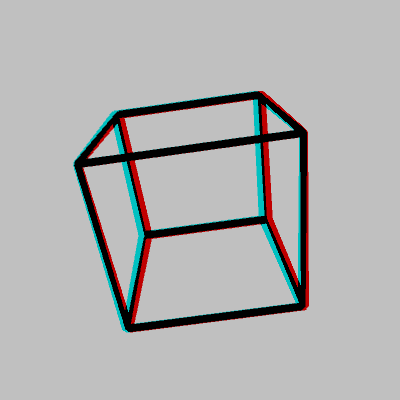

2025-05-11 09:55:29.124 python[1937:23823] NewtNSView::dealloc: softLock still hold @ dealloc!


In [10]:
time.sleep(3)

py5_tools.screenshot(hook_post_draw=True)